In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("/content/Breast_Cancer.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size = 0.2,random_state = 42)

In [19]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [20]:
model = LogisticRegression(max_iter=1, warm_start=True, solver='saga')
loss_history = []
accuracy_history = []

for i in range(100):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_prob)
    acc = accuracy_score(y_train, model.predict(X_train))

    loss_history.append(loss)
    accuracy_history.append(acc)


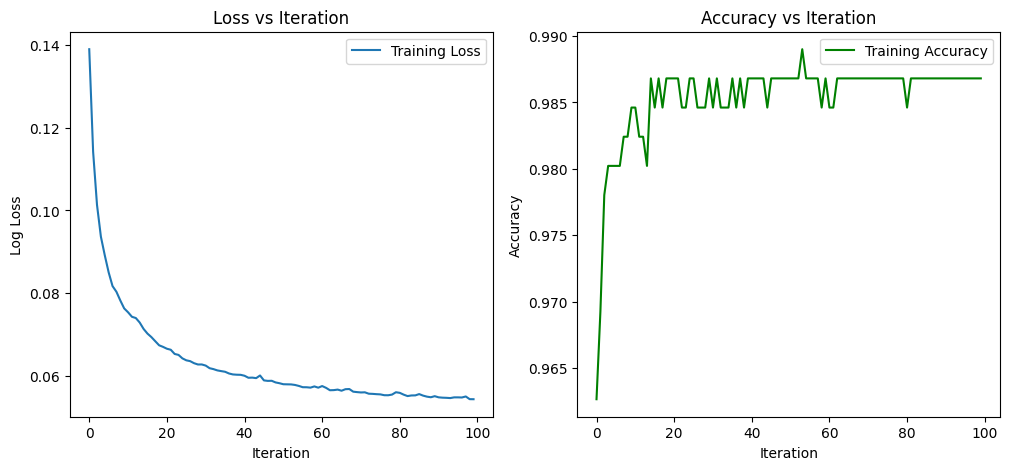

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss vs Iteration')
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracy_history, label='Training Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration')
plt.legend()

plt.show()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# F1-score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9912280701754386
Precision: 0.991349902534113
Recall: 0.9912280701754386
F1 Score: 0.991207141671538
Confusion Matrix:
 [[71  0]
 [ 1 42]]
